# Tucil 2 Intelligensi Buatan 13521057_13521127

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import kurtosis

In [3]:
df = pd.read_csv('data_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [4]:
# Basic statistics of the data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.27500,0.530000,31.962143,0.507857,139.375714,4.481429,...,643.177857,1251.717143,2106.731429,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.32417,0.499278,18.162970,0.288539,35.400803,2.279836,...,444.628980,428.982850,1078.347277,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.00000,0.000000,16.000000,0.200000,108.000000,2.000000,...,273.750000,876.500000,1201.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.00000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.000000,1247.000000,2102.000000,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.800000,169.000000,7.000000,...,950.250000,1627.500000,3035.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.00000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Cleaning

In [5]:
# Check every column unique value
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {len(unique_values)}")

Unique values in battery_power column: 918
Unique values in blue column: 2
Unique values in clock_speed column: 26
Unique values in dual_sim column: 2
Unique values in fc column: 20
Unique values in four_g column: 2
Unique values in int_memory column: 63
Unique values in m_dep column: 10
Unique values in mobile_wt column: 121
Unique values in n_cores column: 8
Unique values in pc column: 21
Unique values in px_height column: 935
Unique values in px_width column: 908
Unique values in ram column: 1170
Unique values in sc_h column: 15
Unique values in sc_w column: 19
Unique values in talk_time column: 19
Unique values in three_g column: 2
Unique values in touch_screen column: 2
Unique values in wifi column: 2
Unique values in price_range column: 4


## Remove Duplicate Values

In [6]:
print("Rows before dropping duplicate values:", len(df))
df.drop_duplicates(inplace=True)
print("Rows after dropping duplicate values:", len(df))

Rows before dropping duplicate values: 1400
Rows after dropping duplicate values: 1400


## Check Missing Values

In [7]:
def check_null_data(data):
    missing = data.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

In [8]:
check_null_data(df)

Dapat dilihat berdasarkan fungsi diatas yang mencari null value untuk tiap kolom, tidak ditemukan satu pun null value pada kolom-kolom yang ada di data sehingga data yand diberikan sudah bagus.

## Check Outlier Value

In [9]:
# Split column into numerical and categorical column
numerical_columns = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]
categorical_columns = []
for column in df.columns:
    if column not in numerical_columns:
        categorical_columns.append(column)

print(numerical_columns)
print(categorical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [10]:
# Checking outlier value for every column using Interquartile Range
def find_outliers_IQR(column):

   Q1 = column.quantile(0.25)

   Q3 = column.quantile(0.75)

   IQR = Q3 - Q1

   outliers = column[( (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)) )]

   return outliers

In [11]:
# Checking outliers for every column
for column in numerical_columns:
    outliers = find_outliers_IQR(df[column])

    print(f"Outlier for column {column}")
    
    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))
    
    print("Outliers index and value:")
    
    if len(outliers) != 0:
        print(outliers)

Outlier for column battery_power
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Outlier for column clock_speed
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Outlier for column fc
number of outliers: 11
max outlier value: 19
min outlier value: 17
Outliers index and value:
53      19
98      18
413     17
603     18
778     18
797     17
1035    18
1072    18
1150    18
1232    18
1342    17
Name: fc, dtype: int64
Outlier for column int_memory
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Outlier for column m_dep
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Outlier for column mobile_wt
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Outlier for column n_cores
number of outliers: 0
max outlier value: nan
min outlier value: nan
Outliers index and value:
Ou

## Plotting Numerical Columns

In [15]:
for column in categorical_columns:
    # Count the frequency of each category
    category_counts = df[column].value_counts()
    print(category_counts)

0    709
1    691
Name: blue, dtype: int64
1    704
0    696
Name: dual_sim, dtype: int64
1    742
0    658
Name: four_g, dtype: int64
1    1065
0     335
Name: three_g, dtype: int64
0    715
1    685
Name: touch_screen, dtype: int64
0    707
1    693
Name: wifi, dtype: int64
0    358
1    356
2    345
3    341
Name: price_range, dtype: int64


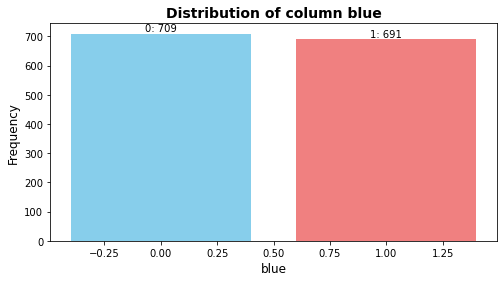

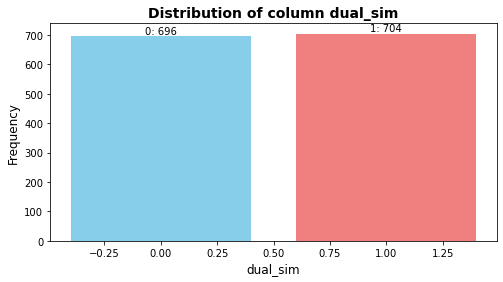

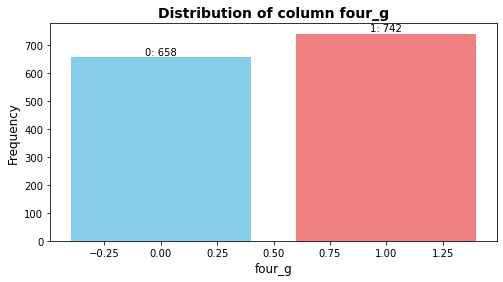

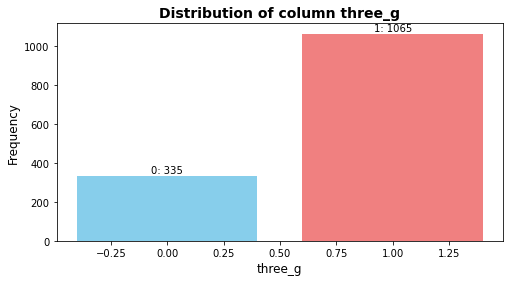

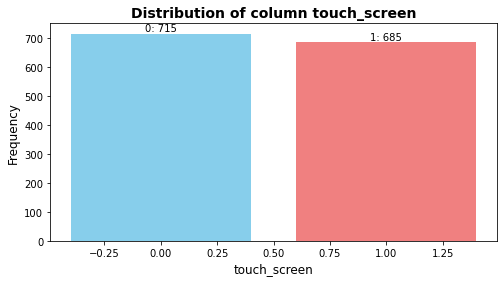

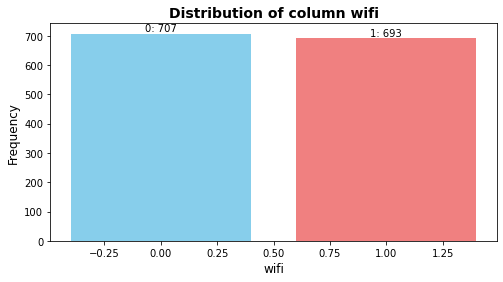

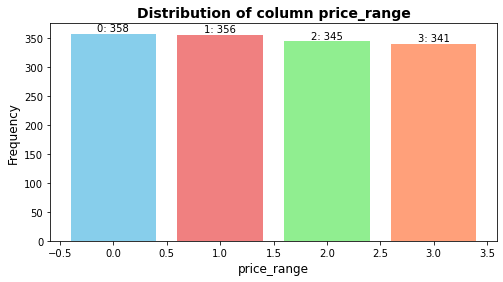

In [16]:
for column in categorical_columns:
    category_counts = df[column].value_counts().sort_index(ascending=True)
    
    plt.figure(figsize=(8, 4))
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']
    plt.bar(category_counts.index, category_counts.values, color=colors, align='center')
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of column {column}', fontsize=14, fontweight='bold')
    
    for i, count in enumerate(category_counts):
        plt.text(i, count + 0.5, f'{category_counts.index[i]}: {count}', ha='center', va='bottom', fontsize=10)
        
    plt.grid(False)
    
    plt.show()

Kurtosis of column battery_power: -1.16818
Kurtosis of column clock_speed: -1.32906
Kurtosis of column fc: 0.28807
Kurtosis of column int_memory: -1.22710
Kurtosis of column m_dep: -1.26659
Kurtosis of column mobile_wt: -1.21017
Kurtosis of column n_cores: -1.23209
Kurtosis of column pc: -1.16401
Kurtosis of column px_height: -0.31938
Kurtosis of column px_width: -1.17611
Kurtosis of column ram: -1.18619
Kurtosis of column sc_h: -1.18333
Kurtosis of column sc_w: -0.33773
Kurtosis of column talk_time: -1.19205


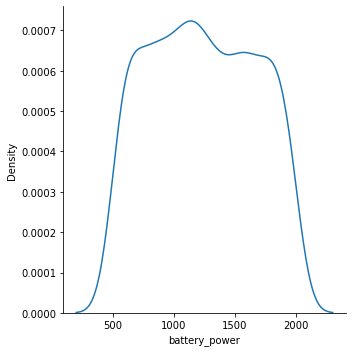

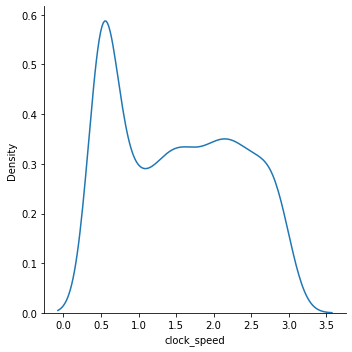

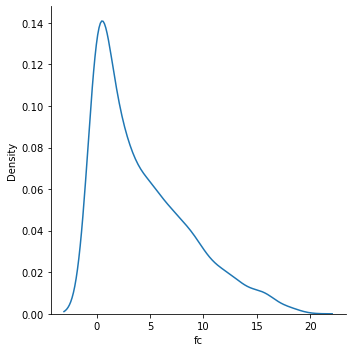

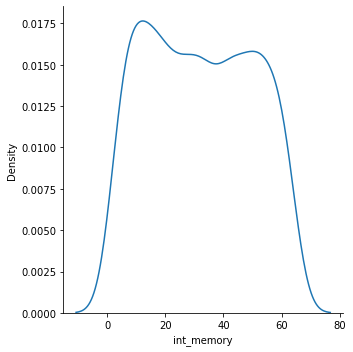

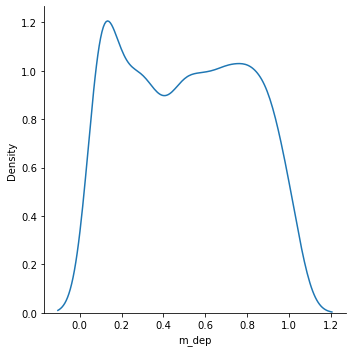

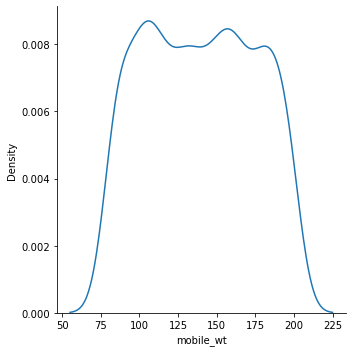

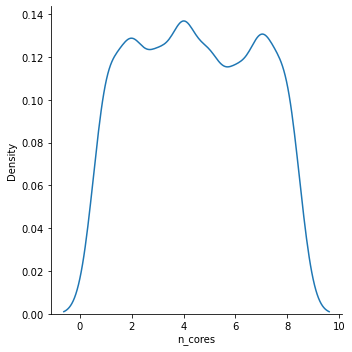

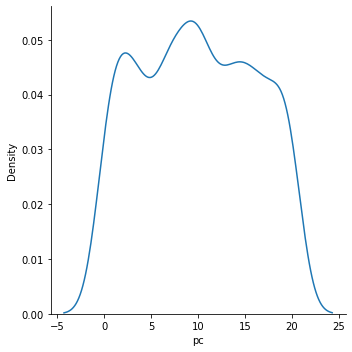

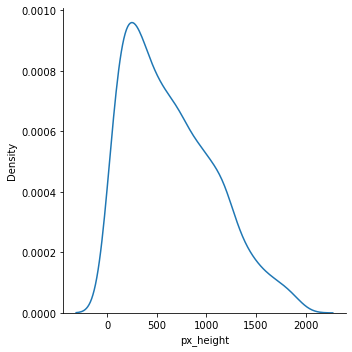

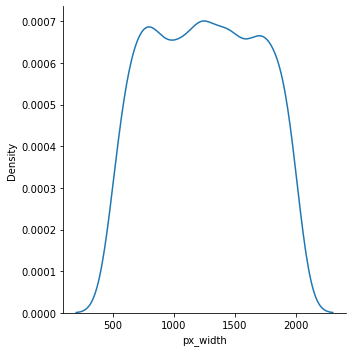

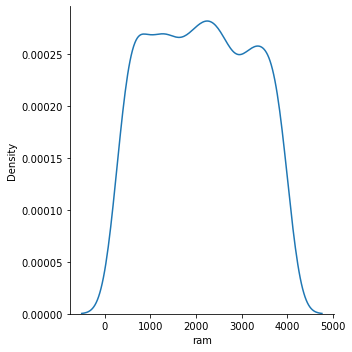

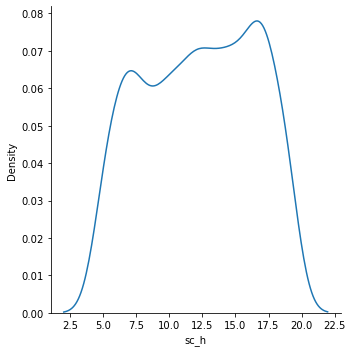

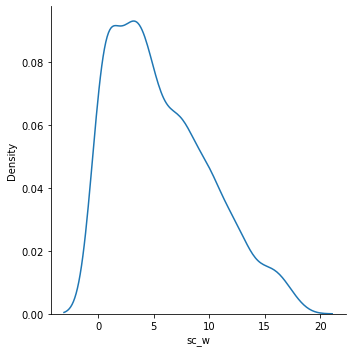

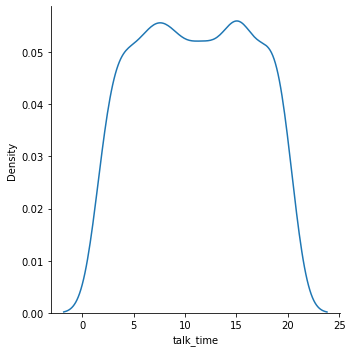

In [47]:
for i, column in enumerate(numerical_columns):
    sns.displot(data=df, x=column, kind="kde")
    kurt = kurtosis(df[column])
    print(f'Kurtosis of column {column}: {kurt:.5f}')

## Plot Korelasi dengan Kolom Target

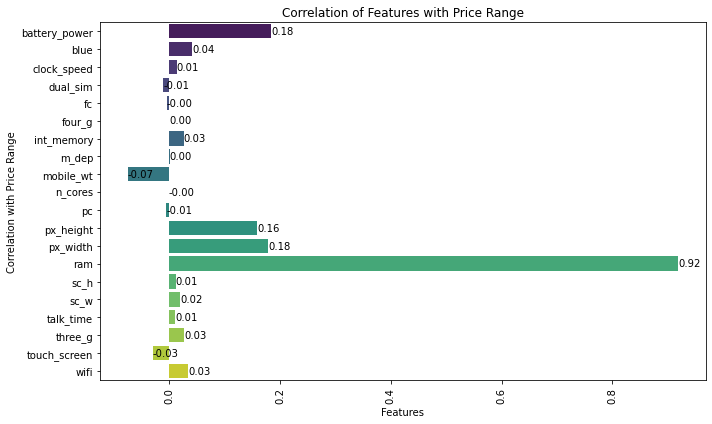

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations with the target variable 'price_range'
correlation_with_target = correlation_matrix['price_range'].drop('price_range')

# Plot the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Price Range')
plt.title('Correlation of Features with Price Range')
plt.tight_layout()

for i, value in enumerate(correlation_with_target):
    plt.text(value, i, f'{value:.2f}', va='center')
plt.show()